In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/AV_data/Janata_Banking'

1.JPG  cover_1_OIHLvzm-thumbnail-1200x1200.png	train.csv
2.JPG  sample_submission.csv
3.JPG  test.csv


In [0]:
import pandas as pd                                                  # to import csv and for data manipulation
import matplotlib.pyplot as plt                                      # to plot graph
import seaborn as sns                                                # for intractve graphs
import numpy as np                                                   # for linear algebra
import datetime                                                      # to deal with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler                     # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier                  # Random forest classifier
from sklearn.tree import DecisionTreeClassifier                      # for Decision Tree classifier
from sklearn.svm import SVC                                          # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV                     # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV               # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score, GridSearchCV, RepeatedStratifiedKFold
import lightgbm as lgb
from sklearn import metrics, preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# from catboost import Pool, CatBoostClassifier, cv
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer

import time
notebookstart= time.time()

In [0]:
file = r'/content/drive/My Drive/AV_data/Janata_Banking/'
sub_df = pd.read_csv(file+'sample_submission.csv')
train_df = pd.read_csv(file+'train.csv')
test_df = pd.read_csv(file+'test.csv')

In [0]:
train_df.shape, test_df.shape, sub_df.shape

((164309, 14), (109541, 13), (109541, 2))

In [0]:
train_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [0]:
test_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [0]:
train_df.dtypes


Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [0]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


### Class Distribution

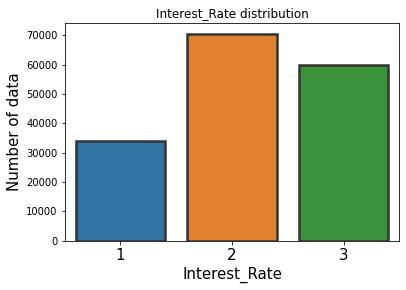

In [0]:
label_count = train_df.groupby('Interest_Rate', as_index = False).count()
class_name = list(label_count['Interest_Rate'])
count = list(label_count['Loan_ID'])

index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Interest_Rate', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Interest_Rate distribution')
plt.show()

In [0]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Missing %'] = ((df.isnull().sum().values)/ (df.shape[0])) *100
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [0]:
resumetable(train_df)

Dataset Shape: (164309, 14)


,Name,dtypes,Missing,Uniques,Missing %,First Value,Second Value,Third Value,Entropy
0,Loan_ID,int64,0,164309,0.000000,10000001,10000002,10000003,17.33
1,Loan_Amount_Requested,object,0,1290,0.000000,"7,000","30,000","24,725",7.14
2,Length_Employed,object,7371,11,4.486060,< 1 year,4 years,7 years,3.10
3,Home_Owner,object,25349,5,15.427639,Rent,Mortgage,Mortgage,1.34
4,Annual_Income,float64,25102,12305,15.277313,68000,NaN,75566.4,8.19
5,Income_Verified,object,0,3,0.000000,not verified,VERIFIED - income,VERIFIED - income source,1.58
6,Purpose_Of_Loan,object,0,14,0.000000,car,debt_consolidation,debt_consolidation,1.90
7,Debt_To_Income,float64,0,3953,0.000000,18.37,14.93,15.88,11.60
8,Inquiries_Last_6Mo,int64,0,9,0.000000,0,0,0,1.75
9,Months_Since_Deliquency,float64,88379,122,53.788289,NaN,17,NaN,6.28


In [0]:
resumetable(test_df)

Dataset Shape: (109541, 13)


,Name,dtypes,Missing,Uniques,Missing %,First Value,Second Value,Third Value,Entropy
0,Loan_ID,int64,0,109541,0.000000,10164310,10164311,10164312,16.74
1,Loan_Amount_Requested,object,0,1246,0.000000,"27,500","26,000","6,075",7.12
2,Length_Employed,object,4936,11,4.506075,10+ years,10+ years,< 1 year,3.10
3,Home_Owner,object,16711,5,15.255475,Mortgage,NaN,Rent,1.34
4,Annual_Income,float64,16898,9028,15.426187,129000,110000,75000,8.17
5,Income_Verified,object,0,3,0.000000,VERIFIED - income,not verified,VERIFIED - income,1.58
6,Purpose_Of_Loan,object,0,14,0.000000,debt_consolidation,credit_card,debt_consolidation,1.91
7,Debt_To_Income,float64,0,3895,0.000000,12.87,11.37,6.83,11.59
8,Inquiries_Last_6Mo,int64,0,9,0.000000,0,0,2,1.75
9,Months_Since_Deliquency,float64,58859,115,53.732392,68,NaN,NaN,6.28


In [0]:
train_df['Loan_Amount_Requested'] = train_df['Loan_Amount_Requested'].apply(lambda x: int(x.replace(',', '')))
test_df['Loan_Amount_Requested'] = test_df['Loan_Amount_Requested'].apply(lambda x: int(x.replace(',', '')))

In [0]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [0]:
# #replace misssing values
# train_df['Length_Employed'].fillna("missing", inplace=True)
# test_df['Length_Employed'].fillna("missing", inplace=True)

for column in train_df[['Length_Employed']]:
    mode = train_df[column].mode()
    train_df[column] = train_df[column].fillna(mode)
for column in test_df[['Length_Employed']]:
    mode = train_df[column].mode()
    test_df[column] = test_df[column].fillna(mode)

train_df['Home_Owner'].fillna("missing", inplace=True)
test_df['Home_Owner'].fillna("missing", inplace=True)

train_df['Months_Since_Deliquency'].fillna("missing", inplace=True)
test_df['Months_Since_Deliquency'].fillna("missing", inplace=True)

train_df['Annual_Income'] = train_df['Annual_Income'].fillna(train_df['Annual_Income'].mean())
test_df['Annual_Income'] = test_df['Annual_Income'].fillna(train_df['Annual_Income'].mean())

In [0]:
train_df.isnull().sum()

Loan_ID                       0
Loan_Amount_Requested         0
Length_Employed            7371
Home_Owner                    0
Annual_Income                 0
Income_Verified               0
Purpose_Of_Loan               0
Debt_To_Income                0
Inquiries_Last_6Mo            0
Months_Since_Deliquency       0
Number_Open_Accounts          0
Total_Accounts                0
Gender                        0
Interest_Rate                 0
dtype: int64

In [0]:
test_df.isnull().sum()

Loan_ID                       0
Loan_Amount_Requested         0
Length_Employed            4936
Home_Owner                    0
Annual_Income                 0
Income_Verified               0
Purpose_Of_Loan               0
Debt_To_Income                0
Inquiries_Last_6Mo            0
Months_Since_Deliquency       0
Number_Open_Accounts          0
Total_Accounts                0
Gender                        0
dtype: int64

In [0]:
train_df.dtypes

Loan_ID                      int64
Loan_Amount_Requested        int64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency     object
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [0]:
# * join the datasets
train_df['is_train']  = 1
test_df['Interest_Rate'] = -99
test_df['is_train'] = 0

### EDA - Plots

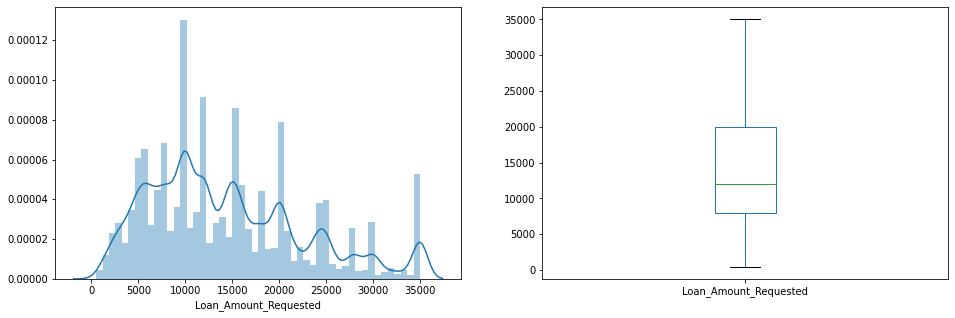

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train_df['Loan_Amount_Requested']));

plt.subplot(122)
(train_df['Loan_Amount_Requested']).plot.box(figsize=(16,5))
plt.show()

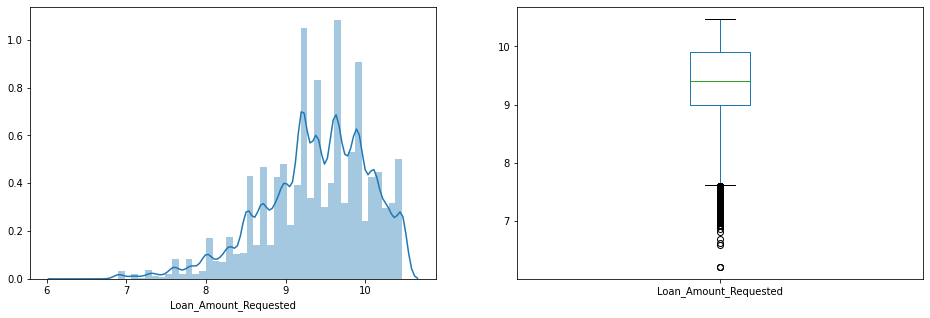

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(np.log1p(train_df['Loan_Amount_Requested']));

plt.subplot(122)
np.log1p(train_df['Loan_Amount_Requested']).plot.box(figsize=(16,5))
plt.show()

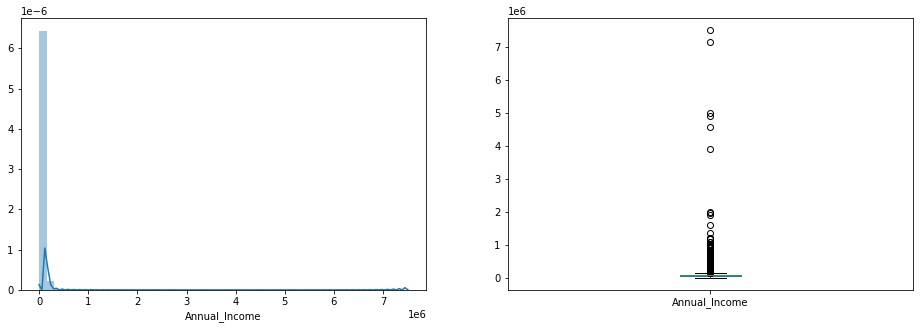

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train_df['Annual_Income']));

plt.subplot(122)
(train_df['Annual_Income']).plot.box(figsize=(16,5))
plt.show()

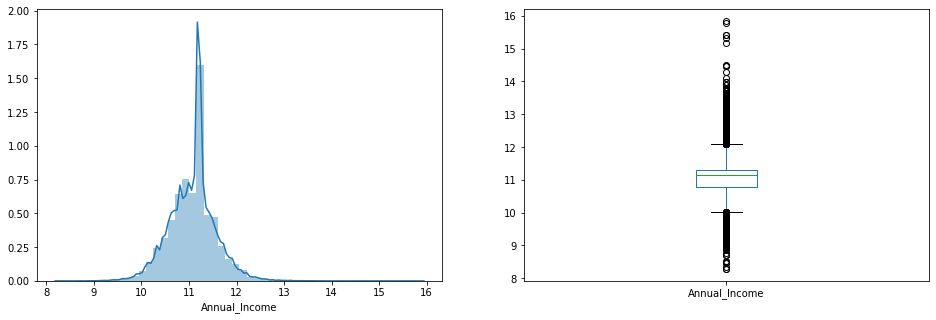

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(np.log1p(train_df['Annual_Income']));

plt.subplot(122)
np.log1p(train_df['Annual_Income']).plot.box(figsize=(16,5))
plt.show()

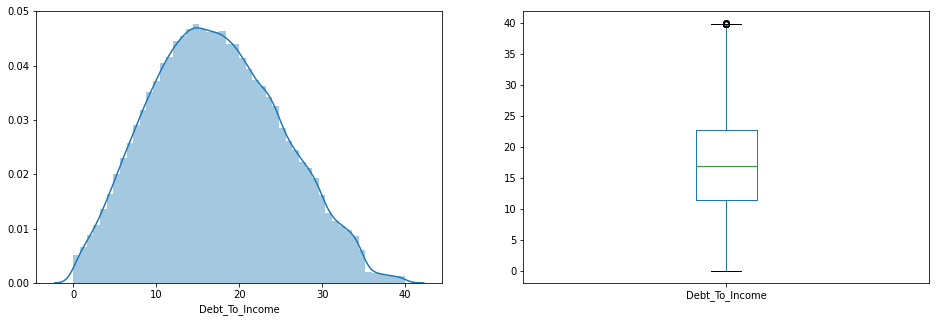

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train_df['Debt_To_Income']));

plt.subplot(122)
(train_df['Debt_To_Income']).plot.box(figsize=(16,5))
plt.show()

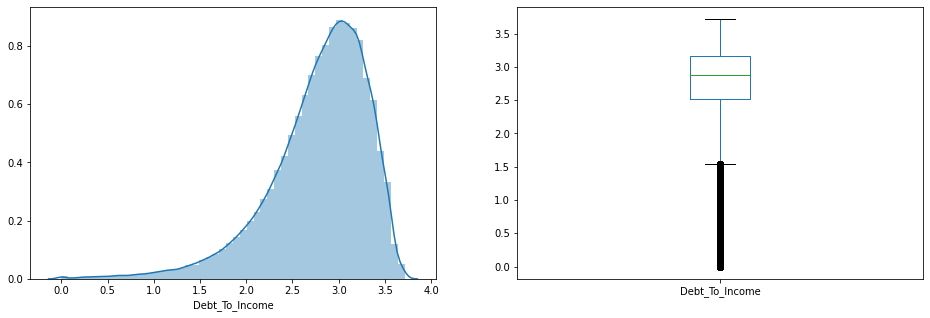

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(np.log1p(train_df['Debt_To_Income']));

plt.subplot(122)
np.log1p(train_df['Debt_To_Income']).plot.box(figsize=(16,5))
plt.show()

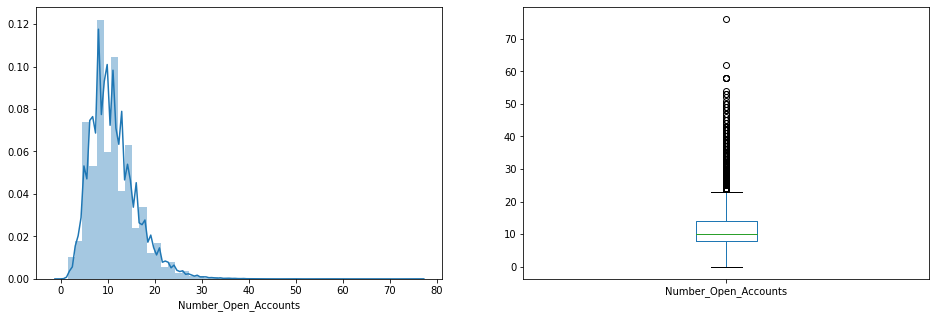

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train_df['Number_Open_Accounts']));

plt.subplot(122)
(train_df['Number_Open_Accounts']).plot.box(figsize=(16,5))
plt.show()

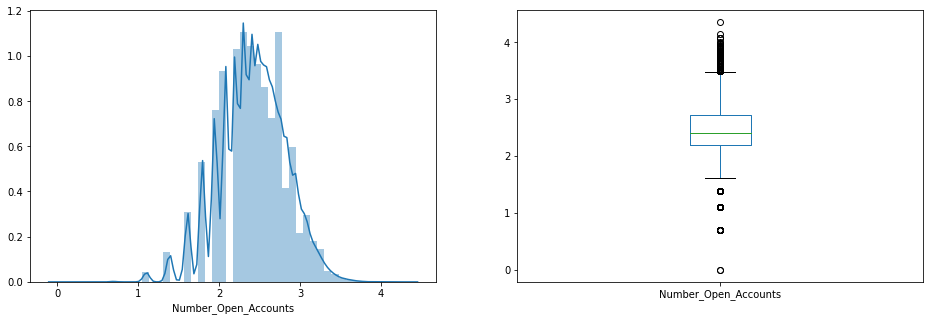

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(np.log1p(train_df['Number_Open_Accounts']));

plt.subplot(122)
np.log1p(train_df['Number_Open_Accounts']).plot.box(figsize=(16,5))
plt.show()

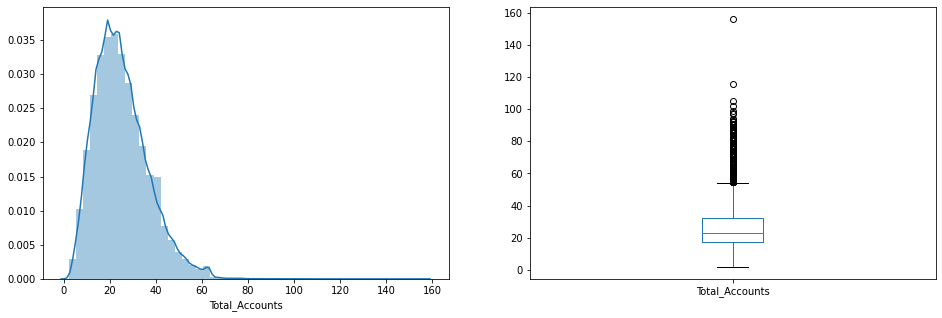

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot((train_df['Total_Accounts']));

plt.subplot(122)
(train_df['Total_Accounts']).plot.box(figsize=(16,5))
plt.show()

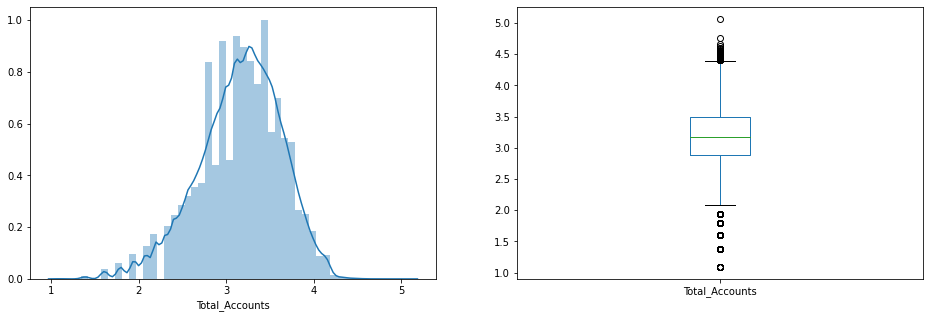

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(np.log1p(train_df['Total_Accounts']));

plt.subplot(122)
np.log1p(train_df['Total_Accounts']).plot.box(figsize=(16,5))
plt.show()

In [0]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,is_train
0,10000001,7000,< 1 year,Rent,68000.000000,not verified,car,18.37,0,missing,9,14,Female,1,1
1,10000002,30000,4 years,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,17,12,24,Female,3,1
2,10000003,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,missing,12,16,Male,3,1
3,10000004,16000,< 1 year,missing,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,missing,16,22,Male,3,1
4,10000005,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,missing,19,30,Female,1,1


In [0]:
train_df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [0]:
test_df['Length_Employed'].unique()

array(['10+ years', '< 1 year', '6 years', '8 years', '1 year', '3 years',
       '2 years', nan, '4 years', '7 years', '5 years', '9 years'],
      dtype=object)

In [0]:
set(test_df['Length_Employed'].values).difference(set(train_df['Length_Employed'].values))

set()

In [0]:
train_df['Length_Employed'] = train_df['Length_Employed'].replace('< 1 year', '0.5 years')
test_df['Length_Employed'] = test_df['Length_Employed'].replace('< 1 year', '0.5 years')

train_df['Length_Employed'] = train_df['Length_Employed'].replace('< 1 year', '0.5 years')
test_df['Length_Employed'] = test_df['Length_Employed'].replace('< 1 year', '0.5 years')

train_df['Length_Employed'] = train_df['Length_Employed'].replace('10+ years', '10 years')
test_df['Length_Employed'] = test_df['Length_Employed'].replace('10+ years', '10 years')

train_df['Length_Employed'] = train_df['Length_Employed'].replace('10+ years', '10 years')
test_df['Length_Employed'] = test_df['Length_Employed'].replace('10+ years', '10 years')

In [0]:
train_df.dtypes

Loan_ID                      int64
Loan_Amount_Requested        int64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency     object
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
is_train                     int64
dtype: object

In [0]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,is_train
0,10000001,7000,0.5 years,Rent,68000.000000,not verified,car,18.37,0,missing,9,14,Female,1,1
1,10000002,30000,4 years,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,17,12,24,Female,3,1
2,10000003,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,missing,12,16,Male,3,1
3,10000004,16000,0.5 years,missing,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,missing,16,22,Male,3,1
4,10000005,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,missing,19,30,Female,1,1


In [0]:
train_df.Length_Employed = train_df.Length_Employed.str.split(expand=True)[0].astype(float)
test_df.Length_Employed = test_df.Length_Employed.str.split(expand=True)[0].astype(float)

In [0]:
train_df.dtypes

Loan_ID                      int64
Loan_Amount_Requested        int64
Length_Employed            float64
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency     object
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
is_train                     int64
dtype: object

In [0]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,is_train
0,10000001,7000,0.5,Rent,68000.000000,not verified,car,18.37,0,missing,9,14,Female,1,1
1,10000002,30000,4.0,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,17,12,24,Female,3,1
2,10000003,24725,7.0,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,missing,12,16,Male,3,1
3,10000004,16000,0.5,missing,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,missing,16,22,Male,3,1
4,10000005,17000,8.0,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,missing,19,30,Female,1,1


In [0]:
train_df['Length_Employed'].value_counts()

10.0    52915
2.0     14620
3.0     12974
0.5     12805
5.0     10814
1.0     10422
4.0      9784
7.0      9308
6.0      9094
8.0      7917
9.0      6285
Name: Length_Employed, dtype: int64

In [0]:
train_df['Length_Employed'].fillna(10.0, inplace=True)
test_df['Length_Employed'].fillna(10.0,inplace=True)

In [0]:
train_df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'is_train'],
      dtype='object')

In [0]:
full_df = train_df.append(test_df)

cols = full_df.columns
for col in cols:
    if full_df[col].dtype==object:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(full_df[col].values.astype('str')))
        full_df[col] = lbl.transform(list(full_df[col].values.astype('str')))

Home_Owner
Income_Verified
Purpose_Of_Loan
Months_Since_Deliquency
Gender


In [0]:
def feature_engineering_df(df):
  df['Number_Open_Accounts_ratio_Total_Accounts'] = df['Number_Open_Accounts']/df['Total_Accounts'] 
  df['Loan_Amount_Requested_ratio_Annual_Income'] = df['Loan_Amount_Requested']/df['Annual_Income']
  df['log_Loan_Amount_Requested'] = np.log1p(df['Loan_Amount_Requested'])
  df['log_Annual_Income'] = np.log1p(df['Annual_Income'])
  df['log_Number_Open_Accounts'] = np.log1p(df['Number_Open_Accounts'])
  df['log_Total_Accounts'] = np.log1p(df['Total_Accounts'])
  return df

In [0]:
full_df = feature_engineering_df(full_df)
full_df.drop(['Loan_Amount_Requested','Annual_Income','Number_Open_Accounts','Total_Accounts'],axis=1,inplace=True)

In [0]:
full_df.head()

,Loan_ID,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Gender,Interest_Rate,is_train,Number_Open_Accounts_ratio_Total_Accounts,Loan_Amount_Requested_ratio_Annual_Income,log_Loan_Amount_Requested,log_Annual_Income,log_Number_Open_Accounts,log_Total_Accounts
0,10000001,0.5,4,2,0,18.37,0,132,0,1,1,0.642857,0.102941,8.853808,11.127278,2.302585,2.708050
1,10000002,4.0,0,0,2,14.93,0,39,0,3,1,0.500000,0.409103,10.308986,11.202755,2.564949,3.218876
2,10000003,7.0,0,1,2,15.88,0,132,1,3,1,0.750000,0.327196,10.115611,11.232780,2.564949,2.833213
3,10000004,0.5,5,1,2,14.34,3,132,1,3,1,0.727273,0.284900,9.680406,10.935978,2.833213,3.135494
4,10000005,8.0,3,1,2,22.17,1,132,0,1,1,0.633333,0.177083,9.741027,11.472114,2.995732,3.433987


In [0]:
# FinalData= FinalData.drop(cols,axis=1)
train = full_df[full_df['is_train']==1]
test = full_df[full_df['is_train']==0]
print(train.shape, test.shape)

train_df = train.copy()
test_df = test.copy()

(164309, 17) (109541, 17)


In [0]:
train_df.columns

Index(['Loan_ID', 'Length_Employed', 'Home_Owner', 'Income_Verified',
       'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Gender', 'Interest_Rate', 'is_train',
       'Number_Open_Accounts_ratio_Total_Accounts',
       'Loan_Amount_Requested_ratio_Annual_Income',
       'log_Loan_Amount_Requested', 'log_Annual_Income',
       'log_Number_Open_Accounts', 'log_Total_Accounts'],
      dtype='object')

### Model Building

In [0]:
X = train_df.drop(['Loan_ID', 'Interest_Rate', 'is_train'],axis=1)
y = train_df['Interest_Rate'].values

test_X = test_df.drop(['Loan_ID', 'Interest_Rate','is_train'],axis=1)

train_X = X
train_y = y


# TODO: Shuffle and split the data into training and testing subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100,shuffle=True)

from imblearn.over_sampling import SMOTE
# creating object for smote 
# sm = SMOTE(random_state=103)
sm=SMOTE(kind='regular',k_neighbors=3)
X_train_res, y_train_res = sm.fit_sample(X_train ,y_train.ravel())
print(X_train_res.shape,y_train_res.shape)

# # Success
# print ("Training and testing split was successful.")


(148218, 14) (148218,)


### Catboost Model

In [0]:
!pip install catboost

     |████████████████████████████████| 64.8MB 46kB/s 


In [0]:
X.columns

Index(['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Gender', 'Number_Open_Accounts_ratio_Total_Accounts',
       'Loan_Amount_Requested_ratio_Annual_Income',
       'log_Loan_Amount_Requested', 'log_Annual_Income',
       'log_Number_Open_Accounts', 'log_Total_Accounts'],
      dtype='object')

In [0]:
#train catboost model with categorical features on X,y
from catboost import CatBoostClassifier
categorical_features_indices = [1,2,3,5,6,7]

model=CatBoostClassifier(iterations=1500, loss_function= 'MultiClass', random_seed=1)
model.fit(X, y,cat_features=categorical_features_indices,plot=True)

pred=model.predict(test_X)
# Learning rate set to 0.044409

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.072866
0:	learn: 1.0839459	total: 659ms	remaining: 16m 27s
1:	learn: 1.0712925	total: 1.2s	remaining: 14m 56s
2:	learn: 1.0600970	total: 1.73s	remaining: 14m 22s
3:	learn: 1.0503950	total: 2.19s	remaining: 13m 38s
4:	learn: 1.0418627	total: 2.73s	remaining: 13m 37s
5:	learn: 1.0341582	total: 3.19s	remaining: 13m 13s
6:	learn: 1.0275133	total: 3.74s	remaining: 13m 17s
7:	learn: 1.0209136	total: 4.33s	remaining: 13m 27s
8:	learn: 1.0145130	total: 4.97s	remaining: 13m 43s
9:	learn: 1.0087096	total: 5.56s	remaining: 13m 48s
10:	learn: 1.0036700	total: 6.11s	remaining: 13m 46s
11:	learn: 0.9992075	total: 6.57s	remaining: 13m 34s
12:	learn: 0.9947822	total: 7.16s	remaining: 13m 38s
13:	learn: 0.9909235	total: 7.74s	remaining: 13m 41s
14:	learn: 0.9874634	total: 8.26s	remaining: 13m 37s
15:	learn: 0.9839336	total: 8.84s	remaining: 13m 39s
16:	learn: 0.9810045	total: 9.35s	remaining: 13m 36s
17:	learn: 0.9779747	total: 9.96s	remaining: 13m 40s
18:	learn: 0.9754897	total:

In [0]:
pred

array([[2],
       [1],
       [3],
       ...,
       [2],
       [3],
       [2]])

In [0]:
np.unique(pred, return_counts=True)

(array([1, 2, 3]), array([11363, 58503, 39675]))

In [0]:
sub_df['Interest_Rate'] = pred
sub_df.to_csv('cb.csv',index=False)